In [25]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Загрузка данных

In [26]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [27]:
x_train.shape

(50000, 32, 32, 3)

In [28]:
x_test.shape

(10000, 32, 32, 3)

In [29]:
x_train[0][0]

array([[ 59,  62,  63],
       [ 43,  46,  45],
       [ 50,  48,  43],
       [ 68,  54,  42],
       [ 98,  73,  52],
       [119,  91,  63],
       [139, 107,  75],
       [145, 110,  80],
       [149, 117,  89],
       [149, 120,  93],
       [131, 103,  77],
       [125,  99,  76],
       [142, 115,  91],
       [144, 112,  86],
       [137, 105,  79],
       [129,  97,  71],
       [137, 106,  79],
       [134, 106,  76],
       [124,  97,  64],
       [139, 113,  78],
       [139, 112,  75],
       [133, 105,  69],
       [136, 105,  74],
       [139, 108,  77],
       [152, 120,  89],
       [163, 131, 100],
       [168, 136, 108],
       [159, 129, 102],
       [158, 130, 104],
       [158, 132, 108],
       [152, 125, 102],
       [148, 124, 103]], dtype=uint8)

In [30]:
print(y_train.shape)
y_train

(50000, 1)


array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

Нормализация

In [31]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [32]:
x_train[0][0]

array([[0.23137255, 0.24313726, 0.24705882],
       [0.16862746, 0.18039216, 0.1764706 ],
       [0.19607843, 0.1882353 , 0.16862746],
       [0.26666668, 0.21176471, 0.16470589],
       [0.38431373, 0.28627452, 0.20392157],
       [0.46666667, 0.35686275, 0.24705882],
       [0.54509807, 0.41960785, 0.29411766],
       [0.5686275 , 0.43137255, 0.3137255 ],
       [0.58431375, 0.45882353, 0.34901962],
       [0.58431375, 0.47058824, 0.3647059 ],
       [0.5137255 , 0.40392157, 0.3019608 ],
       [0.49019608, 0.3882353 , 0.29803923],
       [0.5568628 , 0.4509804 , 0.35686275],
       [0.5647059 , 0.4392157 , 0.3372549 ],
       [0.5372549 , 0.4117647 , 0.30980393],
       [0.5058824 , 0.38039216, 0.2784314 ],
       [0.5372549 , 0.41568628, 0.30980393],
       [0.5254902 , 0.41568628, 0.29803923],
       [0.4862745 , 0.38039216, 0.2509804 ],
       [0.54509807, 0.44313726, 0.30588236],
       [0.54509807, 0.4392157 , 0.29411766],
       [0.52156866, 0.4117647 , 0.27058825],
       [0.

In [33]:
y_train = to_categorical(y_train, 10)
print(y_train.shape)
print(y_train[0])
y_test = to_categorical(y_test, 10)
print(y_test.shape)
print(y_test[0])

(50000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
(10000, 10)
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


Создание модели

In [39]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [40]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

Обучение

In [41]:
history = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_split=0.1, shuffle=True)

Epoch 1/30
1407/1407 [==============================] - 8s 5ms/step - loss: 1.6999 - accuracy: 0.3757 - val_loss: 1.3010 - val_accuracy: 0.5400
Epoch 2/30
1407/1407 [==============================] - 7s 5ms/step - loss: 1.3135 - accuracy: 0.5307 - val_loss: 1.1007 - val_accuracy: 0.6128
Epoch 3/30
1407/1407 [==============================] - 7s 5ms/step - loss: 1.1681 - accuracy: 0.5858 - val_loss: 0.9193 - val_accuracy: 0.6826
Epoch 4/30
1407/1407 [==============================] - 7s 5ms/step - loss: 1.0722 - accuracy: 0.6243 - val_loss: 0.8732 - val_accuracy: 0.6996
Epoch 5/30
1407/1407 [==============================] - 7s 5ms/step - loss: 1.0113 - accuracy: 0.6466 - val_loss: 0.8643 - val_accuracy: 0.6958
Epoch 6/30
1407/1407 [==============================] - 7s 5ms/step - loss: 0.9621 - accuracy: 0.6620 - val_loss: 0.7877 - val_accuracy: 0.7254
Epoch 7/30
1407/1407 [==============================] - 7s 5ms/step - loss: 0.9259 - accuracy: 0.6760 - val_loss: 0.7761 - val_accuracy:

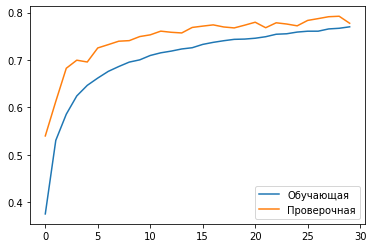

In [42]:
plt.plot(history.history['accuracy'], label='Обучающая')
plt.plot(history.history['val_accuracy'], label='Проверочная')
plt.legend()
plt.show()

Проверка

In [43]:
scores = model.evaluate(x_test, y_test)
print(round(scores[1]*100, 4))

313/313 [==============================] - 1s 4ms/step - loss: 0.7119 - accuracy: 0.7616
76.16
